<a href="https://colab.research.google.com/github/Choiyh1116/AI_capstone/blob/%EB%B3%B4%EC%9D%B4%EC%A7%80%EC%95%8A%EB%8A%94%EA%B2%80%EC%9D%B4%EA%B0%80%EC%9E%A5%EB%AC%B4%EC%84%9C%EC%9A%B4%EB%B2%95/code/transitionPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

dd = pd.read_csv('testcsv1.csv')
dd.head()

,CORREL,CHISQR,INTERSECT,BHATTACHARYYA,EMD,Screen_Transition
0,1.000000,0.000515,0.999023,0.010333,0.000794,0
1,0.999999,0.006968,0.994055,0.033196,0.008548,0
2,0.999971,0.130816,0.977271,0.078075,0.051097,0
3,0.999993,0.041449,0.987530,0.061298,0.028795,0
4,0.999939,0.104661,0.977374,0.073285,0.047236,0


In [4]:
#데이터프레임 자료형이 아닌 리스트로 필요해서 후첨함
r1 = ['CORREL','CHISQR','INTERSECT','BHATTACHARYYA','EMD']
r2 = ['Screen_Transition']

In [5]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
x = dd[['CORREL','CHISQR','INTERSECT','BHATTACHARYYA','EMD']]
y = dd['Screen_Transition']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [8]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
pred = model.predict(x_test) 

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9979


CORREL : 0.000
CHISQR : 0.000
INTERSECT : 0.350
BHATTACHARYYA : 0.000
EMD : 0.650


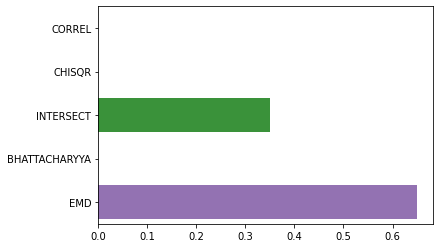

In [10]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature별 importance 매핑
for name, value in zip(r1 , model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=model.feature_importances_ , y=r1)